### Fights Delay Challenge 
(Course on Edx - Data Science Essentials)

This is based on the final challenge at the end of the course with additional work throughs completed to gain a deeper understanding in data exploration, munging and visualization.

#### Data Exploration 
Understanding the data:
There are two datasets provided for this exercise:
1. Flights Delays Data.csv
2. Airport Codes Dataset.csv



In [1]:
#Import standard packages of Pandas and NumPy

import pandas as pd
import numpy as np

#First, we will review the Flight Delays Data file using Pandas read_csv to create a 
#dataframe and info() method to view its structure

df = pd.read_csv('Flight Delays Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719418 entries, 0 to 2719417
Data columns (total 14 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
dtypes: float64(5), int64(8), object(1)
memory usage: 290.5+ MB


In [2]:
#Lets view the first and last 5 rows of the dataframe to get an idea of values in each column

print('First 5 rows:')
print(df.head())
print('----------------------------------------------------------------------------')
print('Last 5 rows:')
print(df.tail())

First 5 rows:
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0  2013      4          19          5      DL            11433          13303   
1  2013      4          19          5      DL            14869          12478   
2  2013      4          19          5      DL            14057          14869   
3  2013      4          19          5      DL            15016          11433   
4  2013      4          19          5      DL            11193          12892   

   CRSDepTime  DepDelay  DepDel15  CRSArrTime  ArrDelay  ArrDel15  Cancelled  
0         837      -3.0       0.0        1138       1.0       0.0        0.0  
1        1705       0.0       0.0        2336      -8.0       0.0        0.0  
2         600      -4.0       0.0         851     -15.0       0.0        0.0  
3        1630      28.0       1.0        1903      24.0       1.0        0.0  
4        1615      -6.0       0.0        1805     -11.0       0.0        0.0  
-------------------------

In [3]:
print('Total number of Carriers: ' + str(df['Carrier'].nunique()))
print('Carriers: ' + str(df['Carrier'].unique()))

Total number of Carriers: 16
Carriers: ['DL' 'AA' 'EV' 'B6' 'F9' 'FL' 'HA' 'MQ' '9E' 'AS' 'US' 'UA' 'VX' 'WN' 'YV'
 'OO']


In [4]:
originAirport = df['OriginAirportID'].sort_values().unique()
destAirport = df['DestAirportID'].sort_values().unique()

#print(df['DestAirportID'].sort_values().nunique())
#print(df['OriginAirportID'].sort_values().nunique())

print('Origin Airports (codes):')
print(originAirport)

print('----------------------------------------------------------------------------')

print('Destination Airports (codes):')
print(destAirport)

print('----------------------------------------------------------------------------')

print(originAirport==destAirport)

Origin Airports (codes):
[10140 10299 10397 10423 10529 10693 10721 10792 10800 10821 11042 11057
 11066 11193 11259 11278 11292 11298 11433 11618 11697 12173 12191 12264
 12266 12339 12451 12478 12889 12892 12953 12954 13198 13204 13232 13244
 13303 13342 13487 13495 13796 13830 13851 13871 13891 13930 13931 14027
 14057 14100 14107 14122 14307 14492 14524 14570 14635 14679 14683 14730
 14747 14771 14831 14843 14869 14893 14908 15016 15304 15376]
----------------------------------------------------------------------------
Destination Airports (codes):
[10140 10299 10397 10423 10529 10693 10721 10792 10800 10821 11042 11057
 11066 11193 11259 11278 11292 11298 11433 11618 11697 12173 12191 12264
 12266 12339 12451 12478 12889 12892 12953 12954 13198 13204 13232 13244
 13303 13342 13487 13495 13796 13830 13851 13871 13891 13930 13931 14027
 14057 14100 14107 14122 14307 14492 14524 14570 14635 14679 14683 14730
 14747 14771 14831 14843 14869 14893 14908 15016 15304 15376]
--------------

In [5]:
# Check columns DepDel15 and ArrDel15

print(df['DepDel15'].nunique())
print(df['DepDel15'].unique())

print(df['ArrDel15'].nunique())
print(df['ArrDel15'].unique())

2
[  0.   1.  nan]
2
[ 0.  1.]


In [6]:
# Check column Cancelled

print(df['Cancelled'].nunique())
print(df['Cancelled'].unique())

2
[ 0.  1.]


In [7]:
# Check if any columns have NaN values

print('Columns with NaN Values:')
df.isnull().any()

Columns with NaN Values:


Year               False
Month              False
DayofMonth         False
DayOfWeek          False
Carrier            False
OriginAirportID    False
DestAirportID      False
CRSDepTime         False
DepDelay            True
DepDel15            True
CRSArrTime         False
ArrDelay            True
ArrDel15           False
Cancelled          False
dtype: bool

In [8]:
# Check how many NaN values in those columns

print('Count of NaN Values:')
df.isnull().sum()

Count of NaN Values:


Year                   0
Month                  0
DayofMonth             0
DayOfWeek              0
Carrier                0
OriginAirportID        0
DestAirportID          0
CRSDepTime             0
DepDelay           27444
DepDel15           27444
CRSArrTime             0
ArrDelay           29033
ArrDel15               0
Cancelled              0
dtype: int64

The data can be summarized as below:

1. There are 16 unique Carriers
2. There are 70 unique Airports
3. CRSDepTime and CRSArrTime is given in 24 hour format
4. The DepDelay and ArrDelay is given in minutes
5. The DepDel15 and ArrDel15 is a binary column where if the Departure or Arrival is delayed by more than 15 minutes then it is set to 1 otherwise it is 0
6. There are NaN values in columns DepDelay (27444), DepDel15 (27444) and ArrDelay (29033)
7. Cancelled is a binary column with 1 for yes and 0 for no

In [9]:
df['ArrDelay'].describe() 
#This is only to answer the questions that are part of the course although the data is not accurate due to NaN values

count    2.690385e+06
mean     6.637688e+00
std      3.864881e+01
min     -9.400000e+01
25%     -1.100000e+01
50%     -3.000000e+00
75%      1.000000e+01
max      1.845000e+03
Name: ArrDelay, dtype: float64

In [10]:
df['DepDelay'].describe()
#This is only to answer the questions that are part of the course although the data is not accurate due to NaN values

count    2.691974e+06
mean     1.053687e+01
std      3.609953e+01
min     -6.300000e+01
25%     -4.000000e+00
50%     -1.000000e+00
75%      9.000000e+00
max      1.863000e+03
Name: DepDelay, dtype: float64

We will now look at the Airports Codes Dataset:

In [11]:
# Create a new dataframe from the csv file

airport_codes = pd.read_csv('Airport Codes Dataset.csv')
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
airport_id    365 non-null int64
city          365 non-null object
state         365 non-null object
name          365 non-null object
dtypes: int64(1), object(3)
memory usage: 11.5+ KB


In [12]:
#Lets view the first and last 5 rows of the dataframe to get an idea of values in each column

print('First 5 rows:')
print(airport_codes.head())
print('----------------------------------------------------------------------------')
print('Last 5 rows:')
print(airport_codes.tail())

First 5 rows:
   airport_id         city state                                  name
0       10165  Adak Island    AK                                  Adak
1       10299    Anchorage    AK   Ted Stevens Anchorage International
2       10304        Aniak    AK                         Aniak Airport
3       10754       Barrow    AK       Wiley Post/Will Rogers Memorial
4       10551       Bethel    AK                        Bethel Airport
----------------------------------------------------------------------------
Last 5 rows:
     airport_id          city state                                  name
360       11233      Cheyenne    WY   Cheyenne Regional/Jerry Olson Field
361       11097          Cody    WY                  Yellowstone Regional
362       11865      Gillette    WY              Gillette Campbell County
363       12441       Jackson    WY                          Jackson Hole
364       14543  Rock Springs    WY        Rock Springs Sweetwater County


The Airport Codes dataframe is pretty straighforward - giving us the Name, City and State for each corresponding Code. There are a total of 365 unique airports. Note here that our Flights Delay dataframe (df) only has timings on 70 of these airports. 
The next step would be combine this airport codes with out Flights Delay dataframe (df) to make our exploration much more meaningful. 

In [13]:
#Using pd.merge we will first add the Origin Airport details (Name, City and State) corresponding to the OriginAirportID

mergeddf = pd.merge(df, airport_codes, left_on='OriginAirportID', right_on='airport_id')

print(mergeddf.info())
print('----------------------------------------------------------------------------')
print(mergeddf.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719418 entries, 0 to 2719417
Data columns (total 18 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
airport_id         int64
city               object
state              object
name               object
dtypes: float64(5), int64(9), object(4)
memory usage: 394.2+ MB
None
----------------------------------------------------------------------------
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0  2013      4          19          5      DL            11433          13303   
1  2013      4          19          5      DL            11433          11298   
2  2013      4          19        

In [14]:
#Similarly we will use pd.merge to add the Destination Airport details (Name, City and State) corresponding to the DestAirportID

mergeddf2 = pd.merge(mergeddf, airport_codes, left_on='DestAirportID', right_on='airport_id')

print(mergeddf2.info())
print('----------------------------------------------------------------------------')
print(mergeddf2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719418 entries, 0 to 2719417
Data columns (total 22 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
airport_id_x       int64
city_x             object
state_x            object
name_x             object
airport_id_y       int64
city_y             object
state_y            object
name_y             object
dtypes: float64(5), int64(10), object(7)
memory usage: 477.2+ MB
None
----------------------------------------------------------------------------
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0  2013      4          19          5      DL            11433          13303   
1  2013    

In [15]:
# As we can see the OriginAirportID corresponds to airport_id_x and DestAirportID to airport_id_y
# We need to clean up the columns names a little to avoid confusion and can do so using the rename method

mergeddf2.rename(columns={"name_x": "OriginAirport", "city_x": "OriginCity", "state_x": "OriginState", "name_y": "DeptAirport", "city_y": "DeptCity", "state_y": "DeptState"}, inplace=True)

print(mergeddf2.info())
print('----------------------------------------------------------------------------')
print(mergeddf2.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719418 entries, 0 to 2719417
Data columns (total 22 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
airport_id_x       int64
OriginCity         object
OriginState        object
OriginAirport      object
airport_id_y       int64
DeptCity           object
DeptState          object
DeptAirport        object
dtypes: float64(5), int64(10), object(7)
memory usage: 477.2+ MB
None
----------------------------------------------------------------------------
   Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  DestAirportID  \
0  2013      4          19          5      DL            11433          13303   
1  2013    

In [16]:
# We can now delete the extra airport id columns 

mergeddf2.drop('airport_id_x', axis=1, inplace = True)
mergeddf2.drop('airport_id_y', axis=1, inplace = True)

print(mergeddf2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719418 entries, 0 to 2719417
Data columns (total 20 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
OriginCity         object
OriginState        object
OriginAirport      object
DeptCity           object
DeptState          object
DeptAirport        object
dtypes: float64(5), int64(8), object(7)
memory usage: 435.7+ MB
None


In [18]:
# Top 10 airports with delays
print(mergeddf2['DeptAirport'].value_counts().head(10))

 Hartsfield-Jackson Atlanta International    150029
 Chicago O'Hare International                127902
 Los Angeles International                   119062
 Dallas/Fort Worth International             104730
 Denver International                         97264
 Phoenix Sky Harbor International             90360
 San Francisco International                  84397
 McCarran International                       78461
 Charlotte Douglas International              76987
 George Bush Intercontinental/Houston         73777
Name: DeptAirport, dtype: int64


In [20]:
# We will now clean up the data a little. First we will delete all the duplicate entries
# For this we will check the Year, Month, Day, Carrier, Orig and Dest Airports, Departure and Arrival times - 
# if these are same then we will only keep the first entry deleting the rest

mergeddf2.drop_duplicates(subset=['Year','Month','DayofMonth','Carrier','OriginAirportID','DestAirportID','CRSDepTime','CRSArrTime'], keep='first', inplace=True)
print(mergeddf2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719397 entries, 0 to 2719417
Data columns (total 20 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
OriginCity         object
OriginState        object
OriginAirport      object
DeptCity           object
DeptState          object
DeptAirport        object
dtypes: float64(5), int64(8), object(7)
memory usage: 435.7+ MB
None


We can see that the drop_duplicates method has effectively deleted 21 entries

We will now look at the missing values in the 3 columns - DepDelay, DepDel15 and ArrDel

As the no. of missing values for DepDelay and DepDel15 are same chances are it is the same entries, hence we will first look at the DepDelay and ArrDelay columns only

We will replace all NaN with 0 across 

In [21]:
mergeddf2["DepDelay"].fillna(0, inplace=True)
mergeddf2["ArrDelay"].fillna(0, inplace=True)
print(mergeddf2.info())
print(mergeddf2["DepDelay"].isnull().values.any())
print(mergeddf2["ArrDelay"].isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2719397 entries, 0 to 2719417
Data columns (total 20 columns):
Year               int64
Month              int64
DayofMonth         int64
DayOfWeek          int64
Carrier            object
OriginAirportID    int64
DestAirportID      int64
CRSDepTime         int64
DepDelay           float64
DepDel15           float64
CRSArrTime         int64
ArrDelay           float64
ArrDel15           float64
Cancelled          float64
OriginCity         object
OriginState        object
OriginAirport      object
DeptCity           object
DeptState          object
DeptAirport        object
dtypes: float64(5), int64(8), object(7)
memory usage: 435.7+ MB
None
False
False


In [22]:
#Check the DepDelay column

mergeddf2[pd.isnull(mergeddf2['DepDel15'])]['DepDelay'].value_counts()

0.0    27441
Name: DepDelay, dtype: int64

In [23]:
#As all delay times are 0 minutes we can now set the DepDel15 NaN values to 0 as well as delay is under 15 minutes

mergeddf2["DepDel15"].fillna(0, inplace=True)

In [25]:
#Check all missing values have been taken care of
print('Columns with NaN Values:')
mergeddf2.isnull().any()

Columns with NaN Values:


Year               False
Month              False
DayofMonth         False
DayOfWeek          False
Carrier            False
OriginAirportID    False
DestAirportID      False
CRSDepTime         False
DepDelay           False
DepDel15           False
CRSArrTime         False
ArrDelay           False
ArrDel15           False
Cancelled          False
OriginCity         False
OriginState        False
OriginAirport      False
DeptCity           False
DeptState          False
DeptAirport        False
dtype: bool

In [26]:
# Get basic data description for the Arrival and Delay times

print('Arrival Delay')
print(mergeddf2['ArrDelay'].describe())
print('----------------------------------------------------------------------------')
print('Departure Delay')
print(mergeddf2['DepDelay'].describe())

Arrival Delay
count    2.719397e+06
mean     6.566923e+00
std      3.844812e+01
min     -9.400000e+01
25%     -1.100000e+01
50%     -3.000000e+00
75%      1.000000e+01
max      1.845000e+03
Name: ArrDelay, dtype: float64
----------------------------------------------------------------------------
Departure Delay
count    2.719397e+06
mean     1.043062e+01
std      3.593247e+01
min     -6.300000e+01
25%     -4.000000e+00
50%     -1.000000e+00
75%      9.000000e+00
max      1.863000e+03
Name: DepDelay, dtype: float64


So we can draw the following conclusions from the details above:

1. The earliest a flight has arrived is 94 minutes and latest a flight arrival has been delayed is 185 minutes
2. The average arrival delay is around 6.5 minutes with a median value of about 3 minutes early
3. The earliest a flight has departed is 63 minutes and the latest a flight departure has been delayed is 186 minutes
4. The average departure delay is around 10 minutes with a median value of about 1 minute early

### Data Visualization

We will now look at some plots and try to inderstand beteer the relationships between each and in the process see which airports have the most arrival and departure delays and if there are any specific routes that seem to be the most problematic in keeping to schedules. 

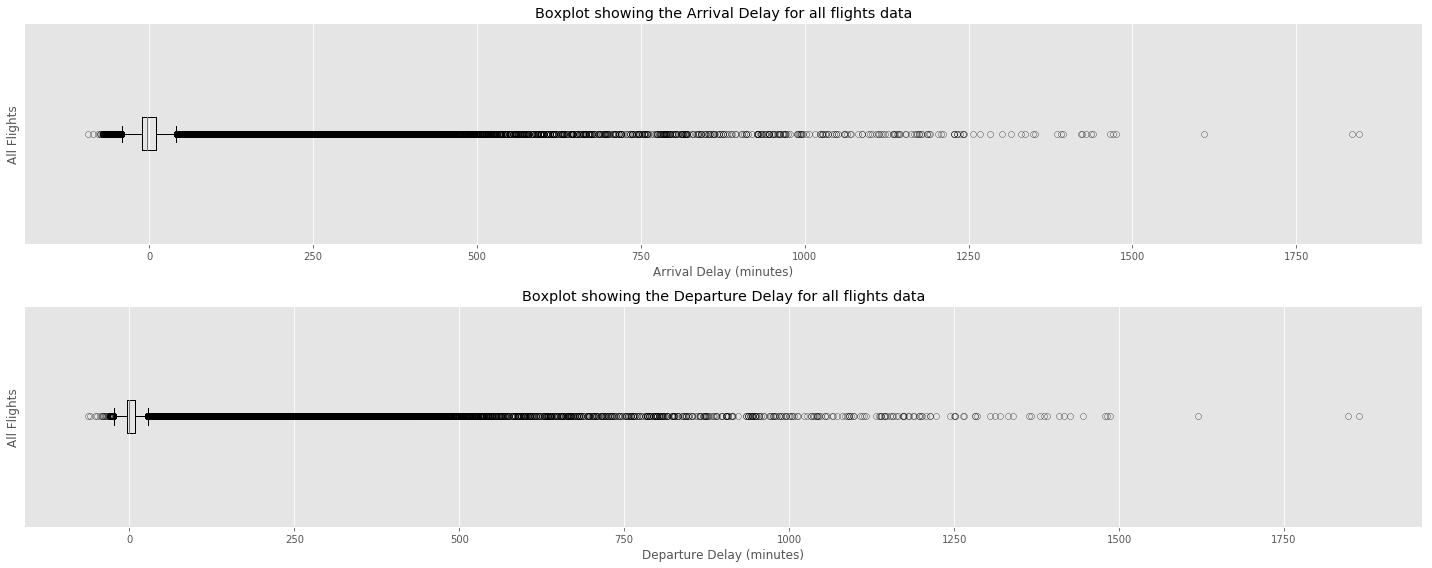

In [27]:
# Import matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#magic command to show plot in the notebook
%matplotlib inline 

# Set style for the plots
plt.style.use('ggplot')

sns.set_context(rc={'lines.markeredgewidth': 0.3})

# Setting the size of the plot
dims = (20,8)
fig, ax = plt.subplots(figsize=dims)

# First subplot will show the Arrival Delay
plt.subplot(211)

# Horizontal boxplot
_ = plt.boxplot(mergeddf2['ArrDelay'], vert=False)
_ = plt.yticks([])

# Set labels and title
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('All Flights')
plt.title('Boxplot showing the Arrival Delay for all flights data')


# Second subplot will show the Departure Delay
plt.subplot(212)

# Horizontal boxplot
_ = plt.boxplot(mergeddf2['DepDelay'], vert=False)
_ = plt.yticks([])

# Set labels and title
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('All Flights')
plt.title('Boxplot showing the Departure Delay for all flights data')

# Adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

From the boxplots above, it is clear that :

1. The median, first quartile, and third quartile are all fairly close to 0, indicating that most flights arrive and depart close to their scheduled time
2. The range of arrival and departure times ranges extensively, with some flights arriving as much as 1500 minutes late
3. The distribution is right-skewed, so there is a higher range of values for late flights than for early flights. 

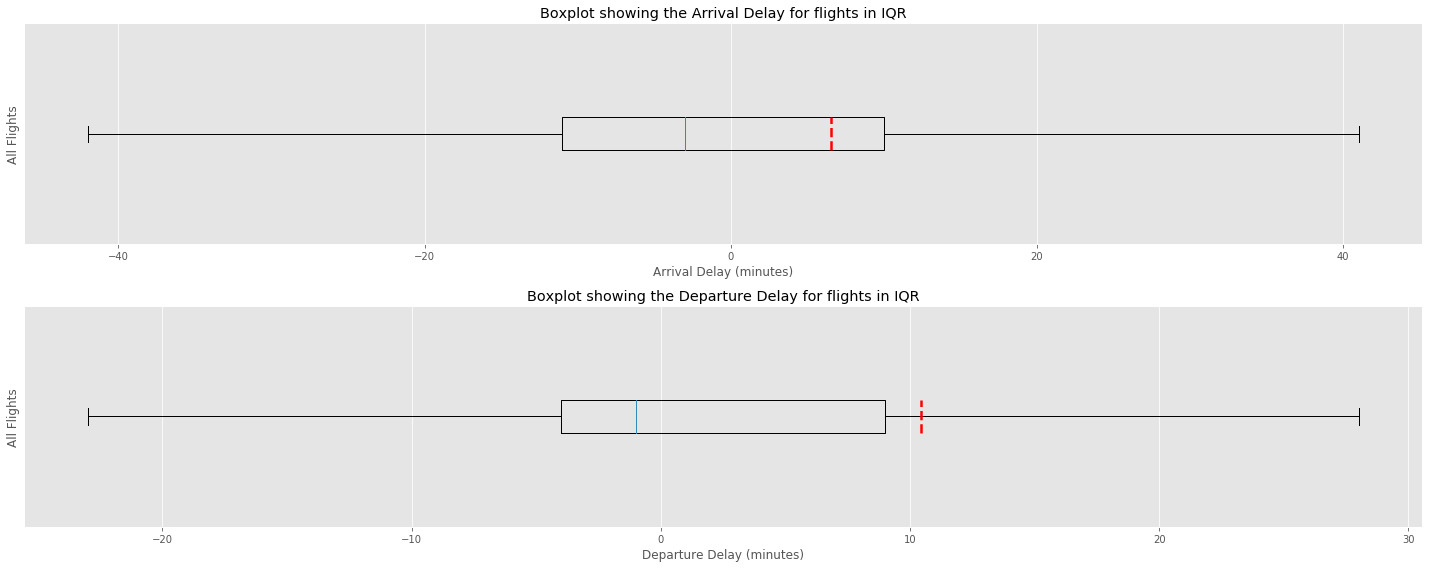

In [28]:
# Setting the size of the plot
fig, ax = plt.subplots(figsize=dims)

# Mean line properties
meanlineprops = dict(linestyle='--', linewidth=2.5, color='red')

# First subplot will show the Arrival Delay
plt.subplot(211)

# Horizontal boxplot not showing outliers (Q3 + 1.5*IQR, Q1 - 1.5*IQR) and showing the mean as a red dotted line
_ = plt.boxplot(mergeddf2['ArrDelay'], vert=False, showfliers=False, showmeans=True, meanline=True, meanprops=meanlineprops)
_ = plt.yticks([])

# Set labels and title
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('All Flights')
plt.title('Boxplot showing the Arrival Delay for flights in IQR')

# Second subplot will show the Departure Delay
plt.subplot(212)

# Horizontal boxplot not showing outliers (Q3 + 1.5*IQR, Q1 - 1.5*IQR) and showing the mean as a red dotted line
_ = plt.boxplot(mergeddf2['DepDelay'], vert=False, showfliers=False, showmeans=True, meanline=True, meanprops=meanlineprops)
_ = plt.yticks([])

# Set labels and title
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('All Flights')
plt.title('Boxplot showing the Departure Delay for flights in IQR')

# Adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

A closer look at the boxplot reiterates the summary we have gotten before:

1. The IQR is fairly close to zero in both cases
2. With the medians at lower than zero 
3. The means shown close to 7 and 10 minute mark for arrival and departure respectively

We will now view histograms of these data points to see the distribution in further detail

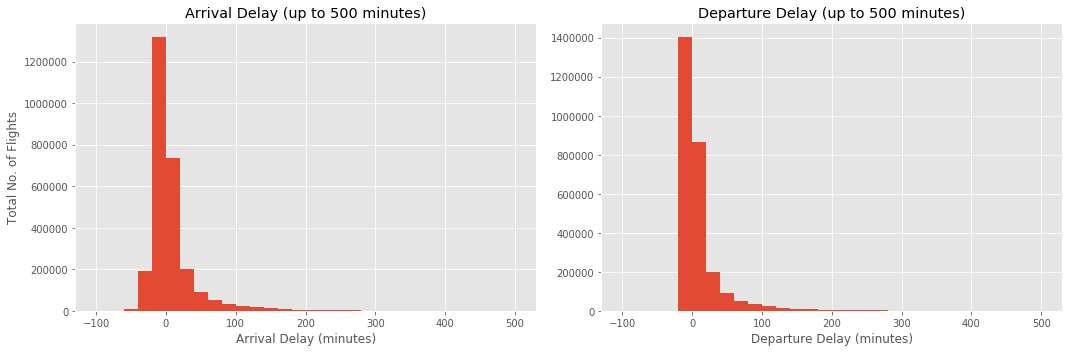

In [29]:
# Setting the size of the plot
dims = (15,5)
fig = plt.subplots(figsize=dims)

# First subplot will show the Arrival Delay
plt.subplot(121)

# Histogram with bins set to 30 and a range of 100 to 500 minutes as majority of dat points lie within this range
_ = plt.hist(mergeddf2['ArrDelay'], bins=30, range=(-100, 500))

# Set labels and title
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Total No. of Flights')
plt.title('Arrival Delay (up to 500 minutes)')

# Second subplot will show the Departure Delay
plt.subplot(122)

# Histogram with bins set to 30 and a range of 100 to 500 minutes as majority of dat points lie within this range
_ = plt.hist(mergeddf2['DepDelay'], bins=30, range=(-100, 500))

# Set labels and title
plt.xlabel('Departure Delay (minutes)')
#plt.ylabel('Total No. of Flights')
plt.title('Departure Delay (up to 500 minutes)')

# Adjust spacing between subplots to minimize the overlaps
plt.tight_layout()

The histograms give us a much clearer view that majority of flights are almost on schedule (close to 0) with the delay right skewed and majority of them tapering off at below 300 minutes. 

The next analysis will look into generating histograms for various columns, conditioned by the ArrDel15 columns and seeing their relationships.

In [30]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

In [31]:
## Define columns for making a conditioned histogram
plot_cols2 = ["DepDelay",
               "CRSArrTime",
               "CRSDepTime",
               "DayofMonth",
               "DayOfWeek",
               "Month"]


'ArrDel15'

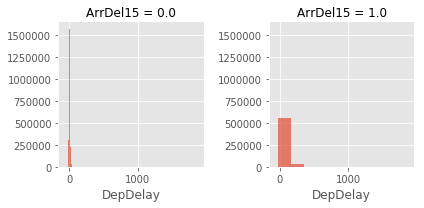

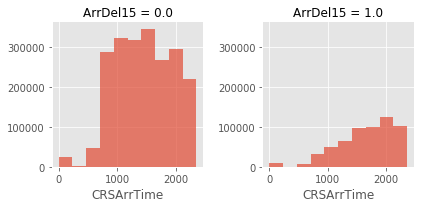

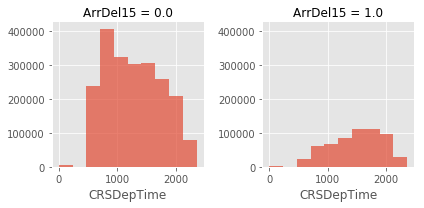

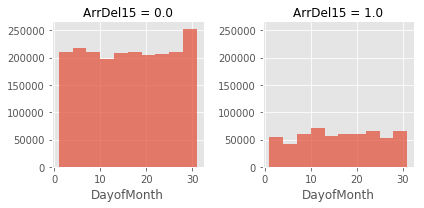

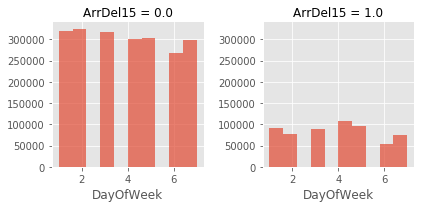

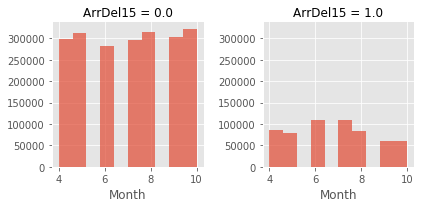

In [32]:
#Call function to gerenate the histograms
cond_hists(mergeddf2, plot_cols2, 'ArrDel15')

From the above histograms, we can draw conclusions as below:

1. There are significantly more flights that are less than 15 minutes late than there are flights that are 15 minutes late or more
2. Flights that are 15 minutes or more late tend to have a higher DepDelay value than flights that are on-time
3. Late flights tend to occur more frequently for flights with a CRSArrTime that is later in the day, the highest volume of delayed flights scheduled to arrive between 3pm (1500 hours) and 8pm (2000 hours) 
4. Late flights tend to be spread out somewhat evenly throughout the days of a month - which no significant spikes or drops on any particular day

We will now look into generating scatter plots for various columns, conditioned by the ArrDel15 column and seeing their relationships.

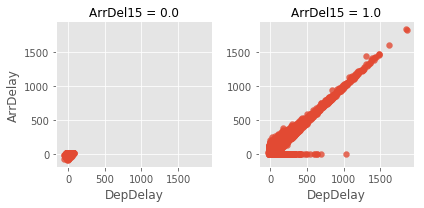

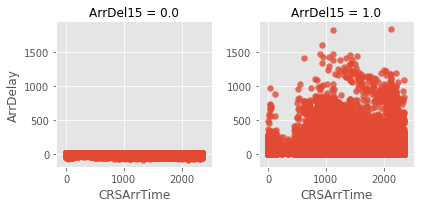

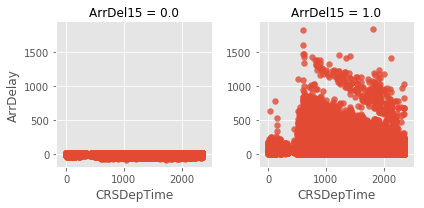

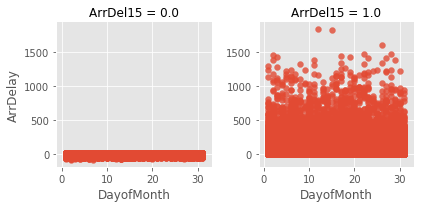

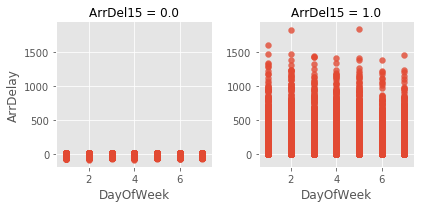

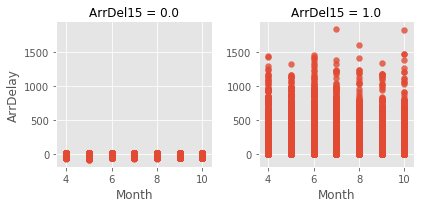

In [33]:
## Function to plot conditioned scatter plots
%matplotlib inline
def cond_plot(cols):
    
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(mergeddf2, col="ArrDel15")
        g.map(sns.regplot, col, "ArrDelay", fit_reg = False)
#        g.map(sns.regplot, "engine-size", "price", fit_reg = False)
cond_plot(plot_cols2) 

We can make the following observations from the plots above:

1. As expected, there is a somewhat clear relationship between the Arrival Delay and Departure Delay
2. There is not a particular day in the week when delays are more or less, similarly for the months - it is somewhat similar
3. There is a relationship between the CRSDepTime and ArrDelay - flights that depart early up to around 5 am in the morning have less delay and the delay tends to increase as the day progresses with a decrease in delay times seen around after 12 pm onwards

This brings me to the end of this exercise on data exploration, munging and visualization. 